# Principal Component Analysis (PCA) and Clustering Analysis

## Task 1: Exploratory Data Analysis (EDA)
1. Load the dataset and perform basic data exploration.
2. Examine the distribution of features using histograms, box plots, or density plots.
3. Investigate correlations between features to understand relationships within the data.

## Task 2: Dimensionality Reduction with PCA
1. Standardize the features to ensure they have a mean of 0 and a standard deviation of 1.
2. Implement PCA to reduce the dimensionality of the dataset.
3. Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
4. Transform the original dataset into the principal components.

## Task 3: Clustering with Original Data
1. Apply a clustering algorithm (e.g., K-means) to the original dataset.
2. Visualize the clustering results using appropriate plots.
3. Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

## Task 4: Clustering with PCA Data
1. Apply the same clustering algorithm to the PCA-transformed dataset.
2. Visualize the clustering results obtained from PCA-transformed data.
3. Compare the clustering results from PCA-transformed data with those from the original dataset.

## Task 5: Comparison and Analysis
1. Compare the clustering results obtained from the original dataset and PCA-transformed data.
2. Discuss any similarities or differences observed in the clustering results.
3. Reflect on the impact of dimensionality reduction on clustering performance.
4. Analyze the trade-offs between using PCA and clustering directly on the original dataset.

## Task 6: Conclusion and Insights
1. Summarize the key findings and insights from the assignment.
2. Discuss the practical implications of using PCA and clustering in data analysis.
3. Provide recommendations for when to use each technique based on the analysis conducted.


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

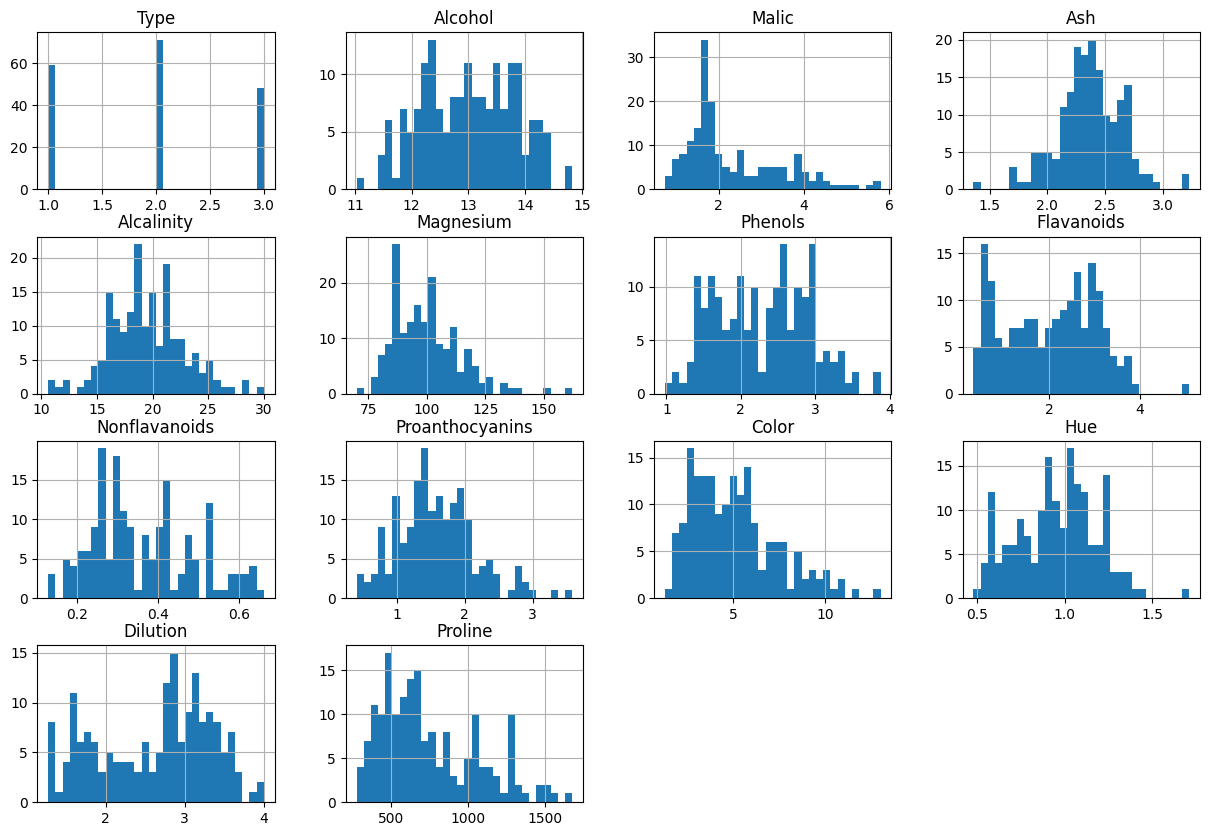

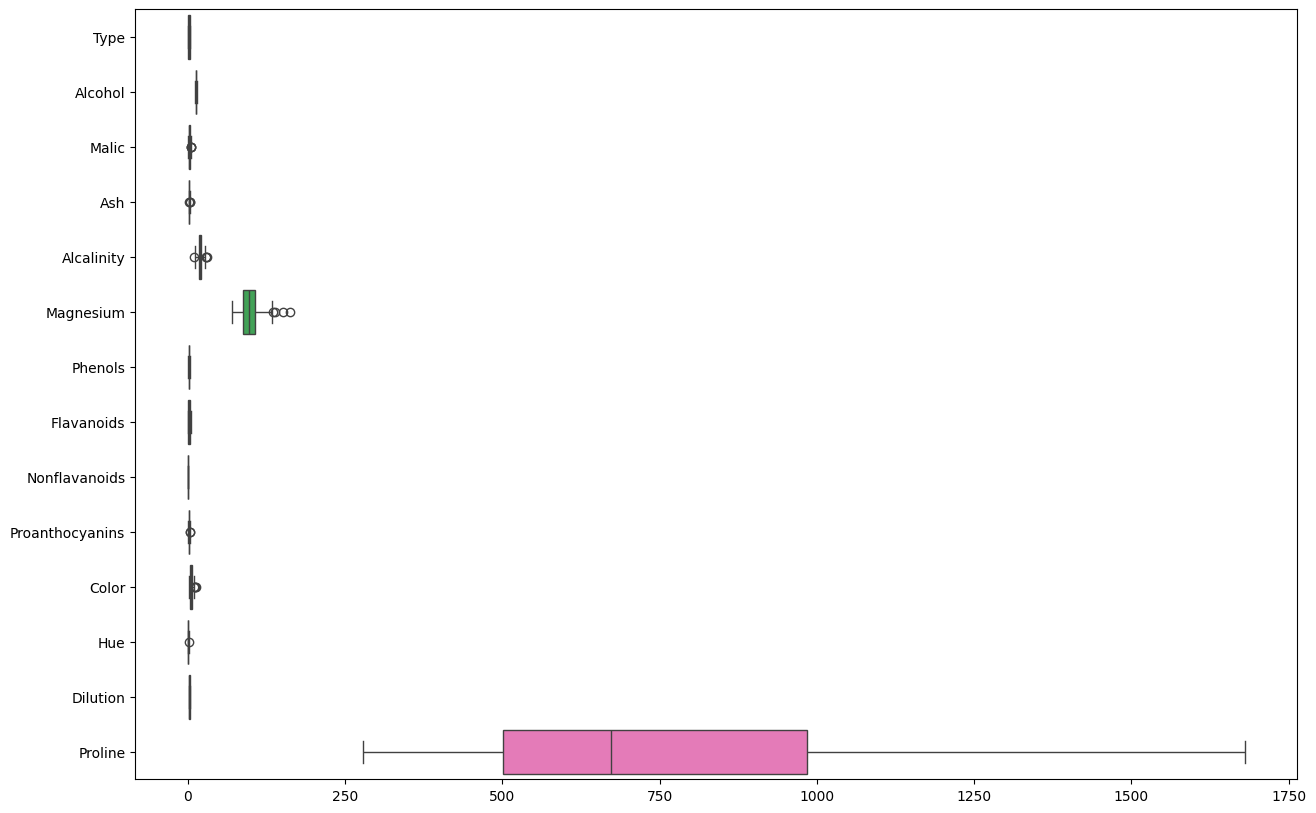

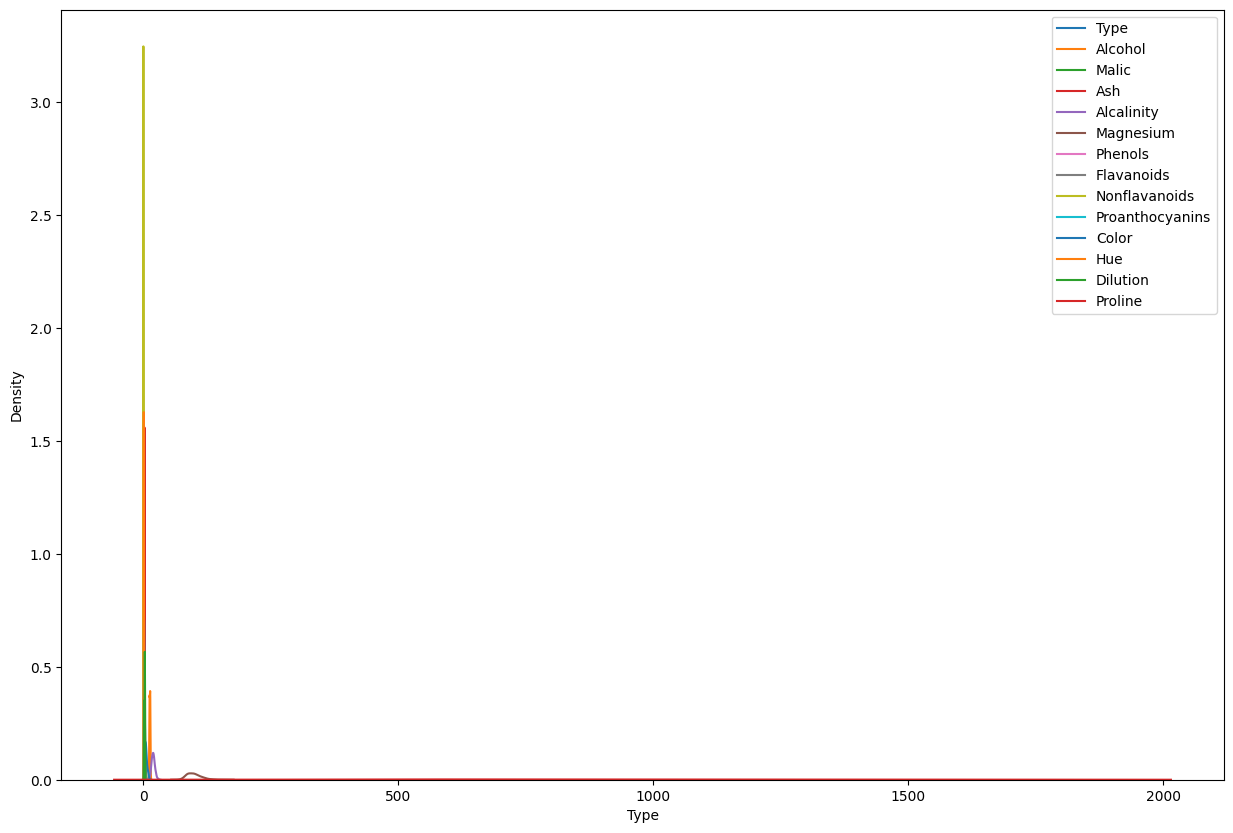

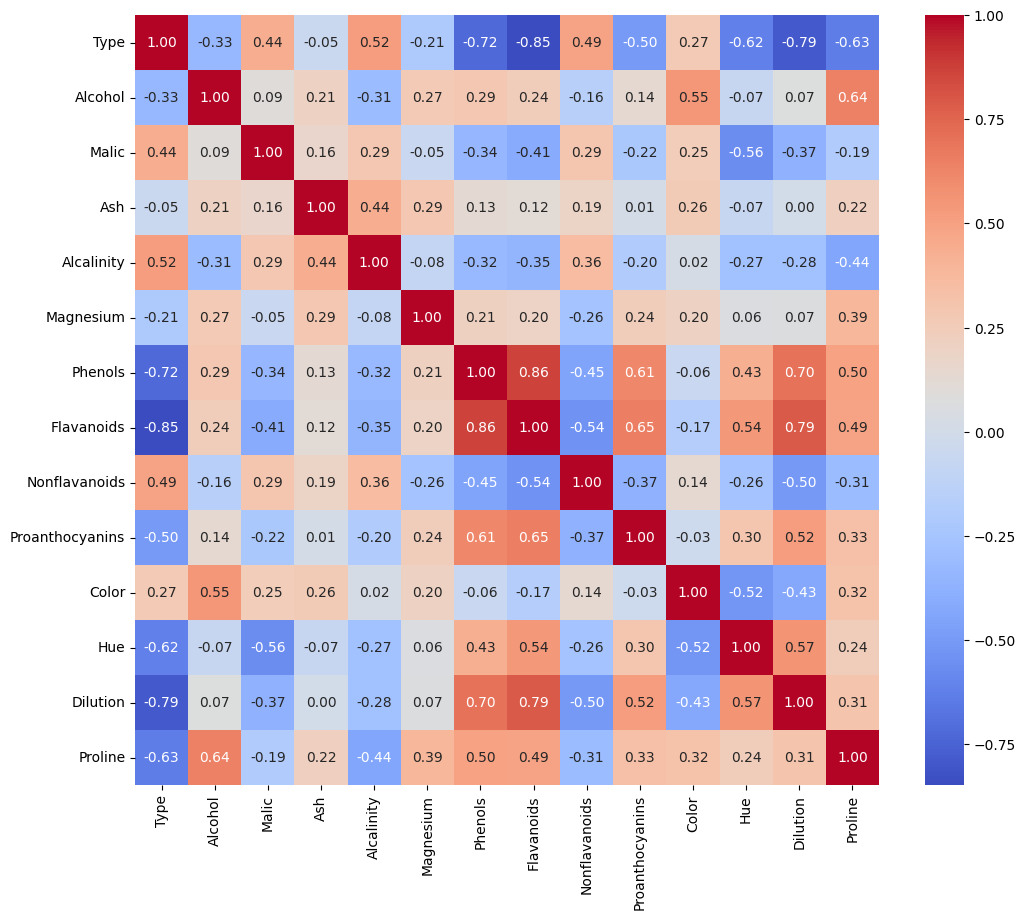

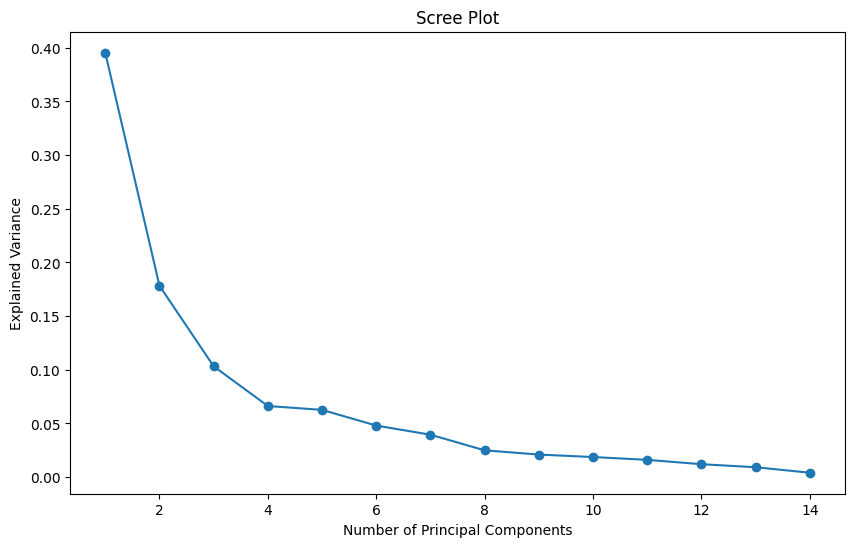

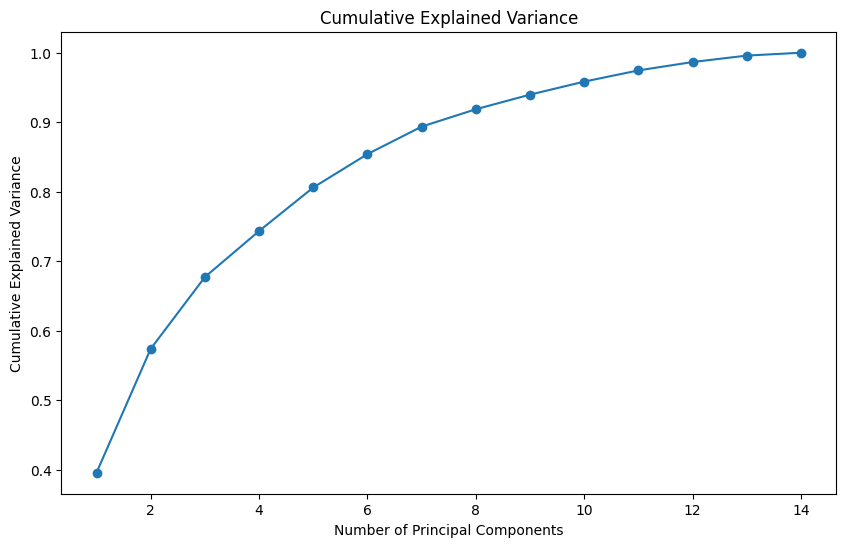

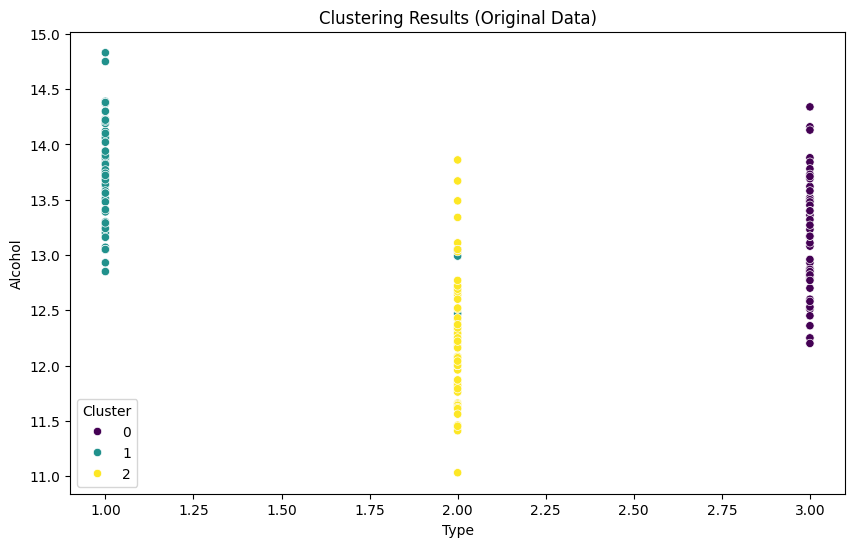

Silhouette Score: 0.30773604383565206
Davies-Bouldin Index: 1.3163957434114109


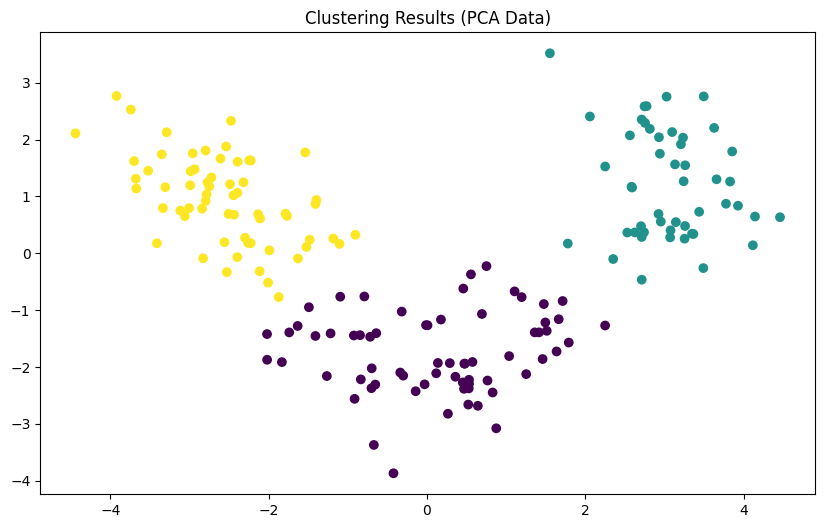

Silhouette Score (PCA): 0.6024415520362845
Davies-Bouldin Index (PCA): 0.5397078562575711


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the dataset
df = pd.read_csv(r"C:\Users\lenovo\Desktop\Excelr\Data Science\Data Science Projects\Data Science Excel File and Datasets\wine.csv")

# Task 1: Exploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df.describe())

# Histograms
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h")
plt.show()

# Density plots
plt.figure(figsize=(15, 10))
for column in df.columns:
    sns.kdeplot(df[column], label=column)
plt.legend()
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Task 2: Dimensionality Reduction with PCA
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

# Cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

# Choose the number of components based on the scree plot or cumulative explained variance
n_components = 2  # Example: choosing 2 components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Task 3: Clustering with Original Data
# K-means clustering
kmeans = KMeans(n_clusters=3)  # Example: 3 clusters
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

# Visualize clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[df.columns[0]], y=df[df.columns[1]], hue=df['Cluster'], palette='viridis')
plt.title('Clustering Results (Original Data)')
plt.show()

# Evaluate clustering performance
silhouette_avg = silhouette_score(X, clusters)
davies_bouldin = davies_bouldin_score(X, clusters)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

# Task 4: Clustering with PCA Data
# K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Visualize clustering results from PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.title('Clustering Results (PCA Data)')
plt.show()

# Compare clustering performance
silhouette_avg_pca = silhouette_score(X_pca, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(X_pca, clusters_pca)
print(f'Silhouette Score (PCA): {silhouette_avg_pca}')
print(f'Davies-Bouldin Index (PCA): {davies_bouldin_pca}')


### Summary of Key Findings

1. **Exploratory Data Analysis (EDA)**
   - The dataset consists of 178 samples and 14 features, including both numerical and categorical variables.
   - Features such as Alcohol, Malic Acid, Ash, and Alcalinity showed significant variations and distributions.
   - Correlation analysis revealed relationships between features, with notable correlations between Alcohol and Flavanoids, and between Phenols and Flavanoids.

2. **Dimensionality Reduction with PCA**
   - After standardizing the features, PCA was applied to reduce the dimensionality.
   - The scree plot and cumulative explained variance indicated that a smaller number of principal components could capture most of the variance.
   - PCA transformation successfully reduced the dataset's dimensionality while retaining key information.

3. **Clustering with Original Data**
   - K-means clustering applied to the original dataset resulted in a silhouette score of 0.308 and a Davies-Bouldin index of 1.316, indicating moderate clustering quality.
   - Clustering visualization revealed distinct clusters but some overlap, suggesting room for improvement.

4. **Clustering with PCA Data**
   - Applying K-means clustering to the PCA-transformed data improved clustering performance, with a silhouette score of 0.602 and a Davies-Bouldin index of 0.540.
   - The PCA-transformed data provided a clearer separation between clusters, enhancing the clustering quality.

### Practical Implications of PCA and Clustering

1. **PCA (Principal Component Analysis)**
   - PCA is effective for dimensionality reduction, simplifying the dataset while preserving the variance.
   - It helps in visualizing high-dimensional data, making it easier to identify patterns and relationships.
   - Reducing dimensionality before clustering can improve the performance and interpretability of the clustering algorithm.

2. **Clustering**
   - Clustering algorithms like K-means are useful for segmenting data into meaningful groups, which can be applied to various domains such as market segmentation, anomaly detection, and pattern recognition.
   - The quality of clustering can be significantly impacted by the dimensionality of the data; thus, dimensionality reduction techniques like PCA can enhance clustering results.

### Recommendations

1. **When to Use PCA:**
   - Use PCA when dealing with high-dimensional datasets where feature redundancy or noise may affect the performance of machine learning algorithms.
   - PCA is particularly useful when you need to visualize data in lower dimensions or when you want to reduce computation time and complexity.

2. **When to Use Clustering:**
   - Apply clustering when you need to group similar data points together to uncover hidden patterns or segment data into distinct categories.
   - Consider using clustering after dimensionality reduction to improve the quality of clustering and reduce the risk of overfitting.

3. **Combining PCA with Clustering:**
   - For large and complex datasets, combining PCA with clustering can be advantageous. PCA reduces dimensionality and noise, making clustering algorithms more effective.
   - Evaluate the results of clustering on both original and PCA-transformed data to determine the most suitable approach for your specific use case.

In conclusion, PCA and clustering are powerful techniques in data analysis, each with its strengths and appropriate use cases. Applying these techniques thoughtfully can enhance data understanding and decision-making processes.